In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import tdgl
from tdgl.geometry import box, circle
from tdgl.visualization.animate import create_animation
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from parser import parse_args

In [14]:
args = parse_args()
path = os.path.join(args.output_directory, args.output_file+'.h5')
solution = tdgl.Solution.from_hdf5(path)

Time: 0.0s  Field: 0.39mT


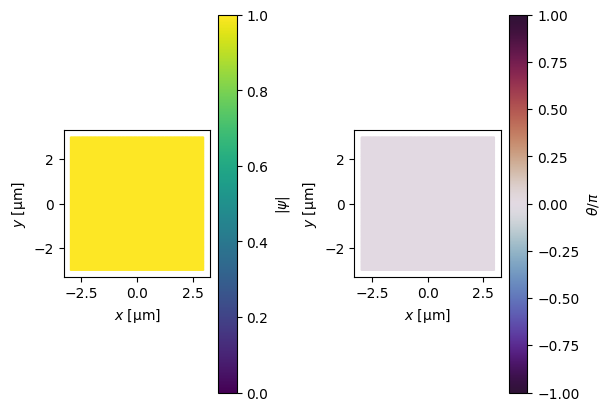

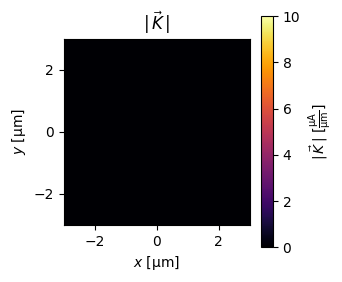

Time: 50.6s  Field: 0.39mT


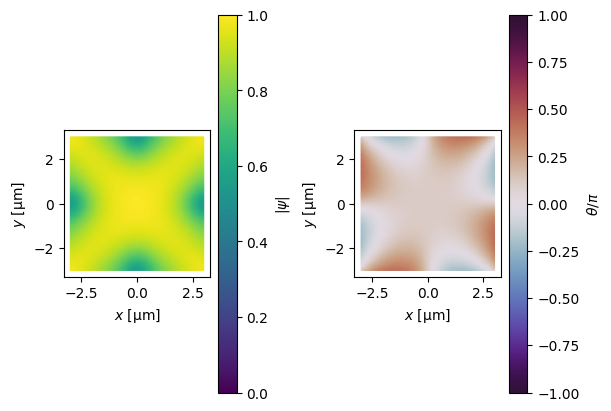

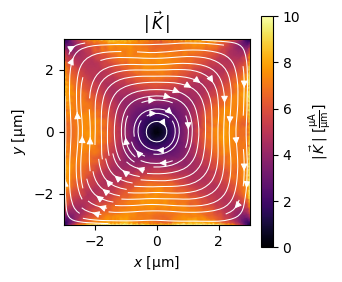

Time: 99.8s  Field: 0.39mT


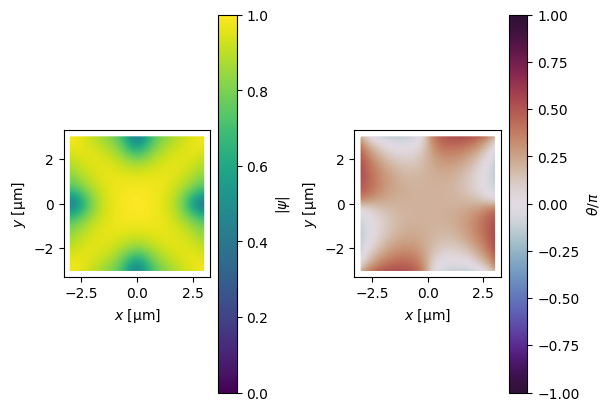

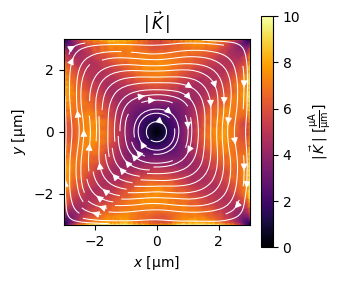

Time: 150.1s  Field: 0.39mT


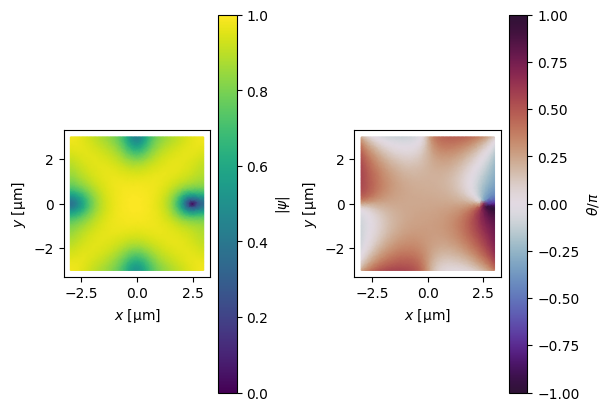

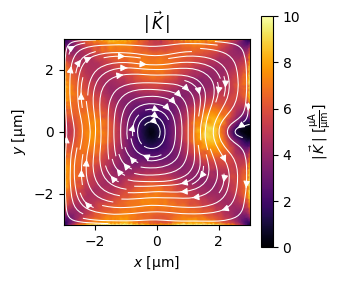

Time: 199.8s  Field: 0.39mT


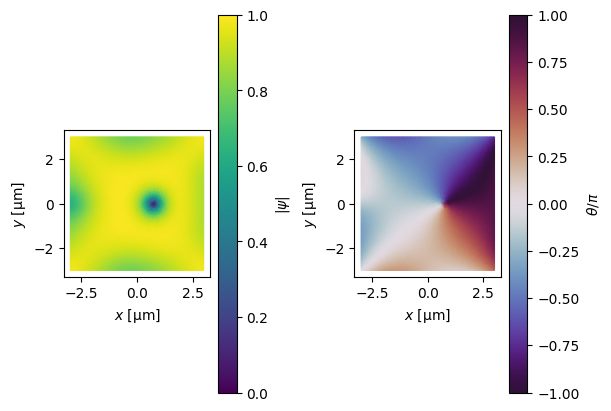

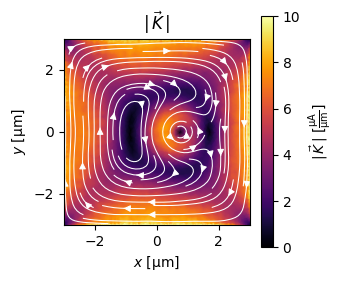

Time: 249.9s  Field: 0.39mT


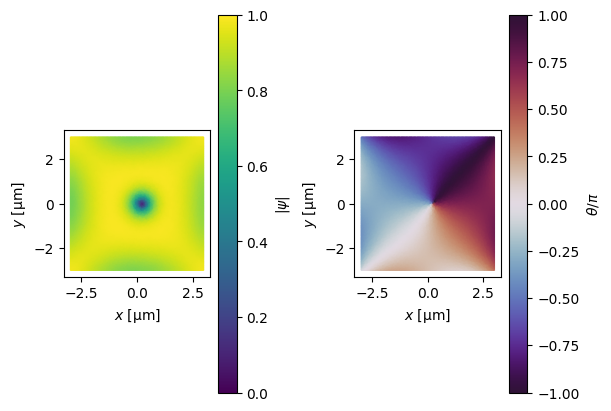

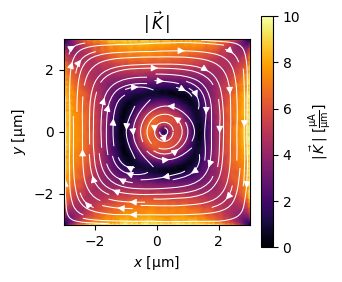

Time: 300.0s  Field: 0.39mT


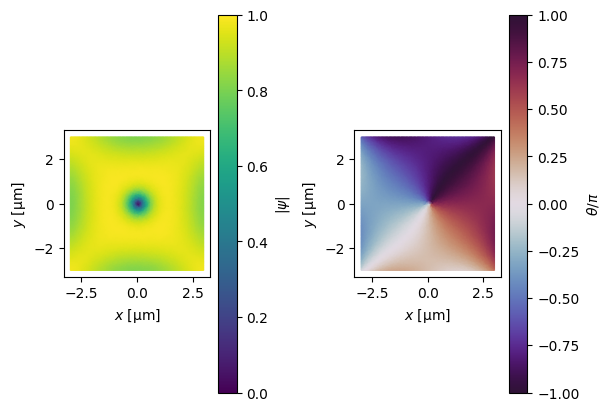

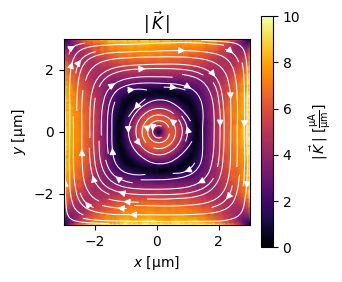

In [15]:
def plot_simulations_of_times(solution, setpoints):
    '''
    Plot the order parameter and current at the time that is closest to the given time points.
    '''
    for time in setpoints:

        step = solution.closest_solve_step(time)
        exact_time = solution.times[step]
        solution.load_tdgl_data(step)

        A = solution.applied_vector_potential(np.array([-1, 1]), np.array([-1, 1]), np.array([0, 0]), t=exact_time)
        Bz = A[0, 0] - A[1, 0]

        print('Time: {exact_time:.1f}s  Field: {field:.2f}{unit}'.format(exact_time = solution.times[step], field = Bz, unit=solution.field_units))
        fig, axes = solution.plot_order_parameter(figsize=(6, 4))
        solution.plot_currents(min_stream_amp=0.075, vmin=0, vmax=10, figsize = (3,3))

        plt.show()

samples = range(0, 301, 50)

plot_simulations_of_times(solution, samples)